# EDA, 탐색적 데이터 분석

In [1]:
import numpy as np

seed = 1234
np.random.seed(seed)

## 데이터 로드

In [4]:
import pandas as pd

# 데이터 경로 지정 및 읽어오기
data_path = '/content/sample_data/insurance.csv'
insurance_data = pd.read_csv(data_path)

# 데이터 꼴 확인
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 기본 분석 및 기초 통계 분석

In [7]:
# 기본 정보
print('#'*20, '기본 정보', '#'*20)
insurance_data.info() # info() 안에서 자동으로 print를 진행

# 기초 통계량
summary_statistics = insurance_data.describe(include='all')
print('#'*20, '기초 통계량', '#'*20)
print(summary_statistics)

#################### 기본 정보 ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
#################### 기초 통계량 ####################
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.20702

# 데이터 전처리

## 카테고리형 변수 인코딩


In [15]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
insurance_encoded = pd.get_dummies(insurance_data, drop_first=True)
insurance_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


## 학습 및 평가 데이터 분리


In [22]:
from sklearn.model_selection import train_test_split
y_column = ['charges']
X = insurance_encoded.drop(y_column, axis=1)
y = insurance_encoded[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


## 특성 스케일링


In [23]:
from sklearn.preprocessing import StandardScaler

encoded_columns = list(set(insurance_encoded.columns) - set(insurance_data.columns)) # ['region_southwest', 'region_southeast', 'region_northwest', 'smoker_yes', 'sex_male']
continuous_columns = list(set(insurance_encoded.columns) - set(encoded_columns) - set(y_column)) # ['bmi', 'age', 'children']

scaler = StandardScaler()

# 수치형 데이터만 스케일링 진행
X_train_continuous = scaler.fit_transform(X_train[continuous_columns])
X_test_continuous = scaler.fit_transform(X_test[continuous_columns])

# 스케일 된 데이터와 스케일에 사용되지 않은 데이터 조합
X_train_continuous_df = pd.DataFrame(X_train_continuous, columns=continuous_columns)
X_test_continuous_df = pd.DataFrame(X_test_continuous, columns=continuous_columns)

X_train_categorical_df = X_train[encoded_columns].reset_index(drop=True)
X_test_categorical_df = X_test[encoded_columns].reset_index(drop=True)

X_train_final = pd.concat([X_train_continuous_df, X_train_categorical_df], axis=1)
X_test_final = pd.concat([X_test_continuous_df, X_test_categorical_df], axis=1)

In [ ]:
# 결과 확인
X_train_final

,children,bmi,age,region_northwest,region_southeast,smoker_yes,sex_male,region_southwest
0,0.734336,-1.756525,0.472227,1,0,0,0,0
1,-0.911192,-1.033082,0.543313,0,0,0,0,0
2,-0.911192,-0.943687,0.898745,0,1,0,0,0
3,3.202629,0.622393,-0.025379,0,1,0,0,0
4,1.557100,-1.504893,1.040918,1,0,0,0,0
...,...,...,...,...,...,...,...,...
1065,2.379865,0.130717,-1.518194,0,0,0,0,0
1066,3.202629,-1.107579,-0.025379,0,1,0,0,0
1067,-0.911192,-0.891539,1.325264,0,0,0,1,0
1068,0.734336,2.820864,-0.167551,0,0,1,0,1


In [ ]:
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


# 모델 구축 및 결과 확인

## 학습 진행

In [26]:
# w0에 해당하는 편향(bias) 부분을 추가

X_train_final['bias'] = 1
X_test_final['bias'] = 1

X_train_final


,bmi,children,age,region_southwest,sex_male,region_southeast,region_northwest,smoker_yes,bias
0,-1.756525,0.734336,0.472227,0,0,0,1,0,1
1,-1.033082,-0.911192,0.543313,0,0,0,0,0,1
2,-0.943687,-0.911192,0.898745,0,0,1,0,0,1
3,0.622393,3.202629,-0.025379,0,0,1,0,0,1
4,-1.504893,1.557100,1.040918,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1065,0.130717,2.379865,-1.518194,0,0,0,0,0,1
1066,-1.107579,3.202629,-0.025379,0,0,1,0,0,1
1067,-0.891539,-0.911192,1.325264,0,1,0,0,0,1
1068,2.820864,0.734336,-0.167551,1,0,0,0,1,1


In [27]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 초기화 및 학습
linear_reg = LinearRegression()
linear_reg.fit(X_train_final, y_train)


# 학습된 모델의 계수(coefficients) 및 절편(intercept) 출력
coefficients = linear_reg.coef_
intercept = linear_reg.intercept_

print('#'*20, '학습된 파라미터 값', '#'*20)
print(coefficients)

print('#'*20, '학습된 절편 값', '#'*20)
print(intercept)

#################### 학습된 파라미터 값 ####################
[[ 2.03622812e+03  5.16890247e+02  3.61497541e+03 -8.09799354e+02
  -1.85916916e+01 -6.57864297e+02 -3.70677326e+02  2.36511289e+04
   0.00000000e+00]]
#################### 학습된 절편 값 ####################
[8955.2448015]


## 학습 모델 평가 진행

In [29]:
from sklearn.metrics import mean_squared_error

# 예측 수행
y_train_pred = linear_reg.predict(X_train_final)
y_test_pred = linear_reg.predict(X_test_final)

# 평가 지표 계산: MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print('학습 데이터를 이용한 MSE 값 :', mse_train)
print('평가 데이터를 이용한 MSE 값 :', mse_test)

학습 데이터를 이용한 MSE 값 : 37277681.70201866
평가 데이터를 이용한 MSE 값 : 33585879.16826562


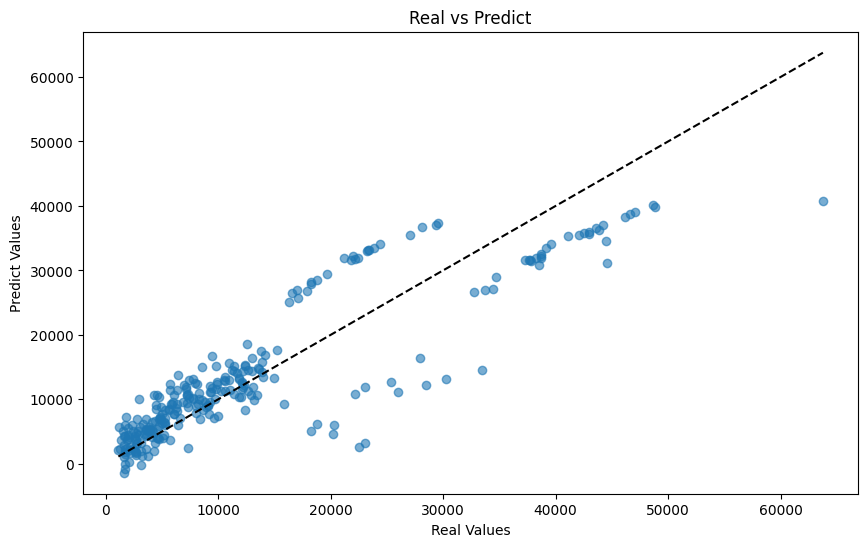

In [ ]:
# 테스트 데이터셋에 대한 실제 값과 예측 값을 산점도로 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # 완벽한 예측을 나타내는 대각선
plt.xlabel('Real Values')
plt.ylabel('Predict Values')
plt.title('Real vs Predict')
plt.show()

## 결과 해석

### 선형 회귀 모델에 영향을 미치는 변수의 중요도

In [ ]:
coeff_df = pd.DataFrame({'feature': X_train_final.columns, 'coefficient': linear_reg.coef_.flatten()})

# 계수의 절대값을 기준으로 내림차순 정렬
coeff_df['abs_coefficient'] = coeff_df['coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='abs_coefficient', ascending=False)

# 변수의 영향력을 확인
coeff_df_sorted

,feature,coefficient,abs_coefficient
5,smoker_yes,23651.128856,23651.128856
2,age,3614.975415,3614.975415
1,bmi,2036.228123,2036.228123
7,region_southwest,-809.799354,809.799354
4,region_southeast,-657.864297,657.864297
0,children,516.890247,516.890247
3,region_northwest,-370.677326,370.677326
6,sex_male,-18.591692,18.591692
8,bias,0.000000,0.000000


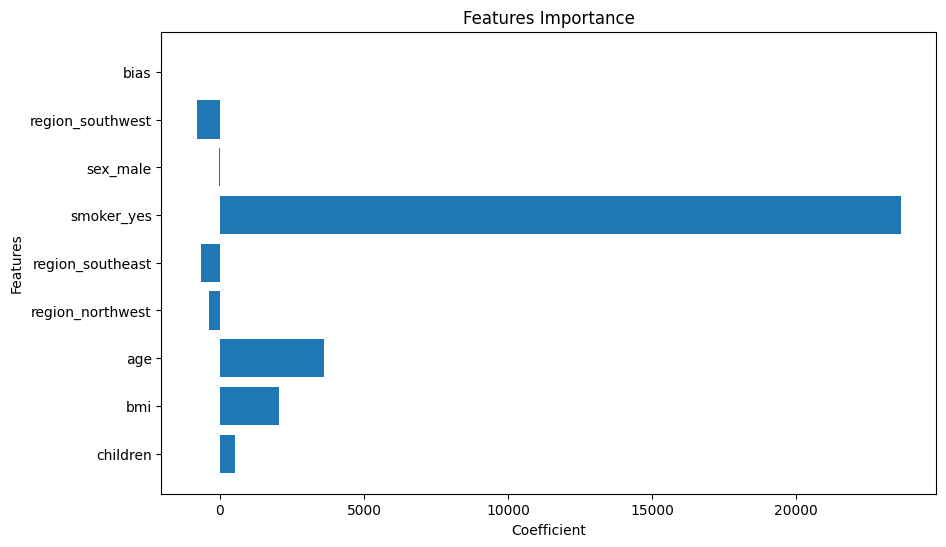

In [ ]:
# 변수 영향력 시각화
plt.figure(figsize=(10, 6))
plt.barh(X_train_final.columns, linear_reg.coef_.flatten())
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Features Importance')
plt.show()

### 잔차 분석

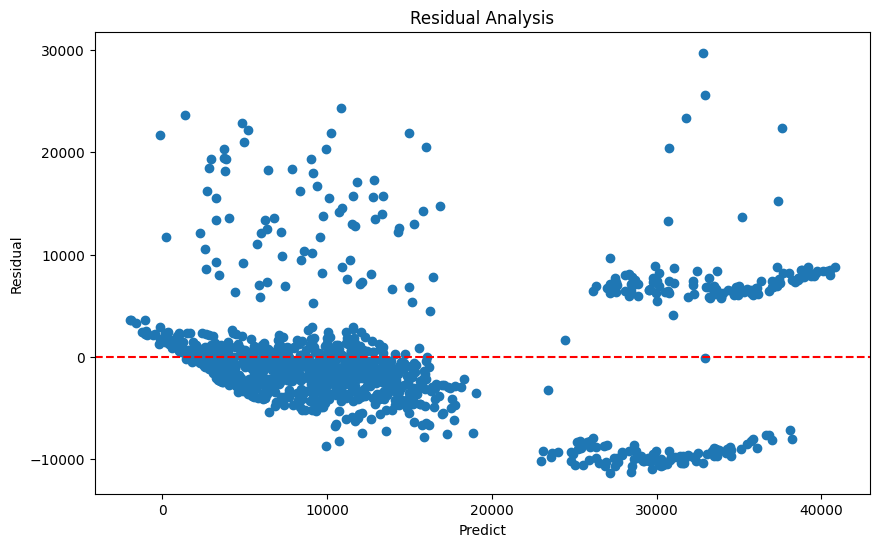

In [ ]:
# 정답과의 차이를 보이는 잔치(residual)을 시각화해
# 이것의 분포를 확인해 데이터의 패턴을 알마나 잘 포착하는지를 판단
# 무작위로 분포되어야 좋은 상황

# 잔차 도출
y_pred = linear_reg.predict(X_train_final)
residuals = y_train - y_pred

# 잔차 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predict')
plt.ylabel('Residual')
plt.title('Residual Analysis')
plt.show()